# Perkenalan

Nama : Hillidatul Ilmi

Batch : 12

# Dataset Description

- Pada graded challenge ini, data diakses menggunakan bigquery-public-data pada Google Cloud Big Query.
- Buka Google Cloud Platform, masuk ke BigQuery, lalu buka tab bigquery-public-data atau klik link berikut atau link berikut untuk langsung menuju ke tabel.

Berikut adalah syntax yang saya gunakan dalam membuat tabel dari query :

In [ ]:
#Memangil atau hanya menampilkan kolom load_type,long_time,load_weight,dropoff_site
SELECT 
load_type,load_time, load_weight, dropoff_site 
# Dari tabel waste_and_diversion pada dataset austin_waste hanya menampilkan 150.000 data
FROM `bigquery-public-data.austin_waste.waste_and_diversion` LIMIT 150000

Berdasarkan perintah query yang di jalankan, maka menghasilkan dataset tabel yang memiliki ukuran 150000 baris dengan 4 kolom, yang jika di save result google drive memakan memori 8,6 MB. Berdasarkan data tabel ini akan di analisis untuk Assignment Problems.

# Assignment Problems

Kamu adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. Sebagai anggota tim, berdasarkan data yang tersedia, coba analisa data tersebut menggunakan statistik deskriptif dan inferensial, serta berikan insight kepada pemerintah kota Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah. Gunakan guideline/langkah berikut untuk mempermudah kamu dalam menganalisa.



### 1

**Nomor 1** : Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb

In [1]:
#Library untuk memangil data
import pandas as pd
import numpy as np

#Menampilkan data tabel austin waste untuk dianalisis
austin_waste = pd.read_csv('h8dsft_P0W3_Hillidatul Ilmii.csv')
austin_waste

,load_type,load_time,load_weight,dropoff_site
0,RECYCLING - SINGLE STREAM,2009-08-07 11:51:00 UTC,4400.0,MRF
1,RECYCLING - PAPER,2008-04-11 12:31:00 UTC,1920.0,MRF
2,RECYCLING - SINGLE STREAM,2009-01-16 12:58:00 UTC,4140.0,MRF
3,RECYCLING - SINGLE STREAM,2009-07-10 11:21:00 UTC,4020.0,MRF
4,RECYCLING - COMINGLE,2006-02-03 12:36:00 UTC,1700.0,MRF
...,...,...,...,...
149995,RECYCLING - SINGLE STREAM,2011-08-17 12:45:00 UTC,13380.0,TDS - MRF
149996,RECYCLING - SINGLE STREAM,2011-06-08 10:59:00 UTC,14080.0,TDS - MRF
149997,RECYCLING - SINGLE STREAM,2012-04-11 12:09:00 UTC,14260.0,TDS - MRF
149998,RECYCLING - SINGLE STREAM,2011-08-31 02:50:00 UTC,4100.0,TDS - MRF


In [2]:
austin_waste.shape

(150000, 4)

Proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data. Data cleaning di lakukan untuk menghindari data yang tidak baik untuk di analisis atau menghindari terjadi nya error akibat tabel berisikan missing value. Missing valuee terjadi karena dua hal yaitu kesalahan manusia dalam meninput data/mengumpulkan data atau secara alamiah sudah mengandung missing value.

In [3]:
# Pengecekan missing value pada tabel austin_waste

# RangeIndex :> menampilkan jumlah entri data, akan menampilkan informasi yang ada di setiap kolom
# Non-Null Count :> Keberadaan missing value yang ada di setiap kolom nya, 
#                   jika jumlah non-null sama dengan entri data berarti keberadaan setdata hampir lengkap
#                   jika jumlah non-null kurang dari entri data bearti terdapat missing value dalam kolom dataset
# Dtype : Menampilkan type data setiap kolomnya (misal : load_weight type datanya float)
# Missing value juga lebih baik di bersihkan atau di benerin
austin_waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   load_type     150000 non-null  object 
 1   load_time     150000 non-null  object 
 2   load_weight   144934 non-null  float64
 3   dropoff_site  150000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.6+ MB


Hasil analisa standard missing value pada kolom load_type, load_time, load_weight dan dropoff_site :

Berdasarkan proses .info yang digunakan untuk melihat spesifikasi masing-masing dataset kolom missing value, maka informasi dataset diperoleh bahwa kolom load_weight mengandung Non-Null Count 144934 non-nul, yang artinya terdapat missing value sebesar 5066 data.

---
Karena terdapat missing value pada kolom load_weight, maka akan dilakukan replace missing values. Dibandingkan dengan menghapusnya/Drop, mengganti nilai missing values menjadi pilihan yang lebih baik karena tidak ada data yang terbuang. Namun tentu data kolom load_weight tersebut menjadi kurang akurat karena diisi dengan nilai yang diperkirakan.

In [4]:
# Pembersihan data
# Replace atau mengisi nilai missing value dengan nilai median
median = austin_waste["load_weight"].median()
austin_waste["load_weight"] = austin_waste["load_weight"].replace(np.nan, median)
data = austin_waste

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   load_type     150000 non-null  object 
 1   load_time     150000 non-null  object 
 2   load_weight   150000 non-null  float64
 3   dropoff_site  150000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.6+ MB


Hasil analisa pembersihan data atau standard missing value pada kolom load_weight diperoleh, berdasarkan proses .info yang digunakan untuk melihat spesifikasi masing-masing dataset kolom standar memiliki nilai 150000 non-null sama dengan entri data sebesar 150000. Sehingga tabel data bisa di gunakan ke tahap analisis statistika deskriptif dan statistika inferensial.

### 2

**Nomor 2** : Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.

a. Melihat rentang waktu pengambilan data

b. Ada apa saja tipe load sampah di kota Austin berdasarkan data

c. Mengetahui tempat pembuangan sampah ada dimana saja

d. Berapa site lokasi yang dibutuhkan untuk menampung berat sampah

e. Apakah lokasi dropoff_site zilker dan park bend memilik kapasitas menampung sampah yang sama

f. Apakah lokasi dropoff_site elmont, kramer dan clarkson memiliki kapasitas menampung sampah yang sama

- Melihat rentang waktu pengambilan data

In [6]:
data['load_time'].min()

'2000-01-26 12:39:00 UTC'

In [7]:
data['load_time'].max()

'2021-07-11 07:07:05 UTC'

- Ada apa saja tipe load sampah di kota Austin berdasarkan data

In [8]:
#Tipe sampah pada kolom load_type
data['load_type'].unique()

array(['RECYCLING - SINGLE STREAM', 'RECYCLING - PAPER',
       'RECYCLING - COMINGLE', 'SWEEPING', 'BRUSH', 'TIRES', 'BULK',
       'RECYCLED METAL', 'YARD TRIMMING', 'MIXED LITTER',
       'GARBAGE COLLECTIONS', 'ORGANICS', 'RECYCLING - PLASTIC BAGS',
       'MULCH', 'LITTER', 'YARD TRIMMING - X-MAS TREES',
       'CONTAMINATED RECYCLING', 'DEAD ANIMAL'], dtype=object)

In [9]:
#Menampilkan tipe sampah yang di buang berdasarkan jumlah datanya
data.groupby(by='load_type')[['load_weight']].sum().sort_values(by='load_weight', ascending=True)

,load_weight
load_type,
RECYCLING - PLASTIC BAGS,680.0
CONTAMINATED RECYCLING,6980.0
YARD TRIMMING - X-MAS TREES,7500.0
DEAD ANIMAL,9700.0
MULCH,18740.0
LITTER,28400.0
MIXED LITTER,54420.0
ORGANICS,82820.0
BULK,236660.0


- Mengetahui tempat pembuangan sampah ada dimana saja

In [10]:
data['dropoff_site'].unique()

array(['MRF', 'ELMONT', 'KRAMER', 'WILCAB', 'ZILKER', 'CLARKSON',
       'PARK BEND', 'TDS - MRF'], dtype=object)

### 3

**Nomor 3** : Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota? (Caution: Jangan gunakan pd.DataFrame.describe())

In [11]:
mrf = data.loc[data['dropoff_site']=='MRF', :]
elmont = data.loc[data['dropoff_site']=='ELMONT', :]
kramer = data.loc[data['dropoff_site']=='KRAMER', :]
wilcab = data.loc[data['dropoff_site']=='WILCAB', :]
zilker = data.loc[data['dropoff_site']=='ZILKER', :]
clarkson = data.loc[data['dropoff_site']=='CLARKSON', :]
park_bend = data.loc[data['dropoff_site']=='PARK BEND', :]
tds_mrf = data.loc[data['dropoff_site']=='TDS - MRF', :]

In [12]:
print('---Dropoff_site/Tempat Pembuangan Sampah di MRF---')
print ('Min: ' + str(mrf['load_weight'].min()))
print ('Max: ' + str(mrf['load_weight'].max()))
print ('Mode: ' + str(mrf['load_weight'].mode()[0]))
print ('Median: ' + str(mrf['load_weight'].median()))
print ('Mean: ' + str(mrf['load_weight'].mean()))
print ('S.dev: ' + str(mrf['load_weight'].std()))
print(      )
print('---Dropoff_site/Tempat Pembuangan Sampah di ELMONT---')
print ('Min: ' + str(elmont['load_weight'].min()))
print ('Max: ' + str(elmont['load_weight'].max()))
print ('Mode: ' + str(elmont['load_weight'].mode()[0]))
print ('Median: ' + str(elmont['load_weight'].median()))
print ('Mean: ' + str(elmont['load_weight'].mean()))
print ('S.dev: ' + str(elmont['load_weight'].std()))
print(      )
print('---Dropoff_site/Tempat Pembuangan Sampah di KRAMER---')
print ('Min: ' + str(kramer['load_weight'].min()))
print ('Max: ' + str(kramer['load_weight'].max()))
print ('Mode: ' + str(kramer['load_weight'].mode()[0]))
print ('Median: ' + str(kramer['load_weight'].median()))
print ('Mean: ' + str(kramer['load_weight'].mean()))
print ('S.dev: ' + str(kramer['load_weight'].std()))
print(      )
print('---Dropoff_site/Tempat Pembuangan Sampah di WILCAB---')
print ('Min: ' + str(wilcab['load_weight'].min()))
print ('Max: ' + str(wilcab['load_weight'].max()))
print ('Mode: ' + str(wilcab['load_weight'].mode()[0]))
print ('Median: ' + str(wilcab['load_weight'].median()))
print ('Mean: ' + str(wilcab['load_weight'].mean()))
print ('S.dev: ' + str(wilcab['load_weight'].std()))
print(      )
print('---Dropoff_site/Tempat Pembuangan Sampah di ZILKER---')
print ('Min: ' + str(zilker['load_weight'].min()))
print ('Max: ' + str(zilker['load_weight'].max()))
print ('Mode: ' + str(zilker['load_weight'].mode()[0]))
print ('Median: ' + str(zilker['load_weight'].median()))
print ('Mean: ' + str(zilker['load_weight'].mean()))
print ('S.dev: ' + str(zilker['load_weight'].std()))
print(      )
print('---Dropoff_site/Tempat Pembuangan Sampah di CLARKSON---')
print ('Min: ' + str(clarkson['load_weight'].min()))
print ('Max: ' + str(clarkson['load_weight'].max()))
print ('Mode: ' + str(clarkson['load_weight'].mode()[0]))
print ('Median: ' + str(clarkson['load_weight'].median()))
print ('Mean: ' + str(clarkson['load_weight'].mean()))
print ('S.dev: ' + str(clarkson['load_weight'].std()))
print(      )
print('---Dropoff_site/Tempat Pembuangan Sampah di PARK BEND---')
print ('Min: ' + str(park_bend['load_weight'].min()))
print ('Max: ' + str(park_bend['load_weight'].max()))
print ('Mode: ' + str(park_bend['load_weight'].mode()[0]))
print ('Median: ' + str(park_bend['load_weight'].median()))
print ('Mean: ' + str(park_bend['load_weight'].mean()))
print ('S.dev: ' + str(park_bend['load_weight'].std()))
print(      )
print('---Dropoff_site/Tempat Pembuangan Sampah di TDS - MRF---')
print ('Min: ' + str(tds_mrf['load_weight'].min()))
print ('Max: ' + str(tds_mrf['load_weight'].max()))
print ('Mode: ' + str(tds_mrf['load_weight'].mode()[0]))
print ('Median: ' + str(tds_mrf['load_weight'].median()))
print ('Mean: ' + str(tds_mrf['load_weight'].mean()))
print ('S.dev: ' + str(tds_mrf['load_weight'].std()))

---Dropoff_site/Tempat Pembuangan Sampah di MRF---
Min: 0.0
Max: 27320.0
Mode: 3460.0
Median: 4260.0
Mean: 5305.141835425384
S.dev: 3674.733632630631

---Dropoff_site/Tempat Pembuangan Sampah di ELMONT---
Min: 5480.0
Max: 31857.0
Mode: 5800.0
Median: 5800.0
Mean: 5832.501367989056
S.dev: 758.7406626917704

---Dropoff_site/Tempat Pembuangan Sampah di KRAMER---
Min: 3980.0
Max: 19600.0
Mode: 5800.0
Median: 5800.0
Mean: 5855.632911392405
S.dev: 843.5269369673932

---Dropoff_site/Tempat Pembuangan Sampah di WILCAB---
Min: 2100.0
Max: 24060.0
Mode: 5800.0
Median: 5800.0
Mean: 5817.0660856935365
S.dev: 473.15907586011605

---Dropoff_site/Tempat Pembuangan Sampah di ZILKER---
Min: 1000.0
Max: 75000.0
Mode: 15000.0
Median: 7290.0
Mean: 9316.125
S.dev: 5512.316490097337

---Dropoff_site/Tempat Pembuangan Sampah di CLARKSON---
Min: 5800.0
Max: 18640.0
Mode: 5800.0
Median: 5800.0
Mean: 5833.264248704663
S.dev: 653.5387925501254

---Dropoff_site/Tempat Pembuangan Sampah di PARK BEND---
Min: 3750.0

Interpretasi Statistika Deskriptif Data Lokasi/Tempat Pembuangan sampah:

1. MRF : Rata-rata sampah yang dibuang pada tempat pembuangan MRF sebesar 5305 dengan nilai tengah(Q2) sebesar 4260, nilai rata-rata dan nilai tengah saling berjauhan, hal ini menandakan bahwa sampah yang dibuang pada lokasi MRF tidak berada dalam distribusi normal. Berat sampah yang sering dibuang pada lokasi MRF atau modus sebesar 3460. Jumlah sampah yang dibuang pada lokasi MRF paling sedikit/terendah adalah 0 dan paling banyak/tertinggi adalah 27320. Pembuangan sampah pada lokasi MRF memiliki nilai standar deviasi sebesar 3675, yang berarti sebaran sampel data jauh dari rata-rata nilai sampel itu sendiri atau 3675 data outlier.

2. ELMONT : Rata-rata sampah yang dibuang pada tempat pembuangan ELMONT sebesar 5832 dengan nilai tengah(Q2) sebesar 5800, nilai rata-rata dan nilai tengah saling berdekatan, hal ini menandakan bahwa sampah yang dibuang pada lokasi ELMONT berada dalam distribusi normal. Berat sampah yang sering dibuang pada lokasi ELMONT atau modus sebesar 5800. Jumlah sampah yang dibuang pada lokasi ELMONT paling sedikit/terendah adalah 5480 dan paling banyak/tertinggi adalah 31875. Pembuangan sampah pada lokasi ELMONT memiliki nilai standar deviasi sebesar 759, yang berarti sebaran sampel data jauh dari rata-rata nilai sampel itu sendiri atau 759 data outlier.

3. KRAMER : Rata-rata sampah yang dibuang pada tempat pembuangan KRAMER sebesar 5855 dengan nilai tengah(Q2) sebesar 5800, nilai rata-rata dan nilai tengah saling berdekatan, hal ini menandakan bahwa sampah yang dibuang pada lokasi KRAMER berada dalam distribusi normal. Berat sampah yang sering dibuang pada lokasi KRAMER atau modus sebesar 5800. Jumlah sampah yang dibuang pada lokasi KRAMER paling sedikit/terendah adalah 3980 dan paling banyak/tertinggi adalah 19600. Pembuangan sampah pada lokasi KRAMER memiliki nilai standar deviasi sebesar 843, yang berarti sebaran sampel data jauh dari rata-rata nilai sampel itu sendiri atau 843 data outlier.

4. WILCAB : Rata-rata sampah yang dibuang pada tempat pembuangan WILCAB sebesar 5817 dengan nilai tengah(Q2) sebesar 5800, nilai rata-rata dan nilai tengah saling berdekatan, hal ini menandakan bahwa sampah yang dibuang pada lokasi WILCAB berada dalam distribusi normal. Berat sampah yang sering dibuang pada lokasi WILCAB atau modus sebesar 5800. Jumlah sampah yang dibuang pada lokasi WILCAB paling sedikit/terendah adalah 2100 dan paling banyak/tertinggi adalah 24060. Pembuangan sampah pada lokasi WILCAB memiliki nilai standar deviasi sebesar 473, yang berarti sebaran sampel data jauh dari rata-rata nilai sampel itu sendiri atau 473 data outlier.

5. ZILKER : Rata-rata sampah yang dibuang pada tempat pembuangan ZILKER sebesar 9316 dengan nilai tengah(Q2) sebesar 7290, nilai rata-rata dan nilai tengah saling berjauhan, hal ini menandakan bahwa sampah yang dibuang pada lokasi ZILKER tidak berada dalam distribusi normal. Berat sampah yang sering dibuang pada lokasi ZILKER atau modus sebesar 15000. Jumlah sampah yang dibuang pada lokasi ZILKER paling sedikit/terendah adalah 1000 dan paling banyak/tertinggi adalah 75000. Pembuangan sampah pada lokasi ZILKER memiliki nilai standar deviasi sebesar 5512, yang berarti sebaran sampel data jauh dari rata-rata nilai sampel itu sendiri atau 5512 data outlier.

6. CLARKSON : Rata-rata sampah yang dibuang pada tempat pembuangan CLARKSON sebesar 5833 dengan nilai tengah(Q2) sebesar 5800, nilai rata-rata dan nilai tengah saling berdekatan, hal ini menandakan bahwa sampah yang dibuang pada lokasi CLARKSON berada dalam distribusi normal. Berat sampah yang sering dibuang pada lokasi CLARKSON atau modus sebesar 5800. Jumlah sampah yang dibuang pada lokasi CLARKSON paling sedikit/terendah adalah 5800 dan paling banyak/tertinggi adalah 18640. Pembuangan sampah pada lokasi CLARKSON memiliki nilai standar deviasi sebesar 653, yang berarti sebaran sampel data jauh dari rata-rata nilai sampel itu sendiri atau 653 data outlier.

7. PARK BEND : Rata-rata sampah yang dibuang pada tempat pembuangan PARK BEND sebesar 7474 dengan nilai tengah(Q2) sebesar 5500, nilai rata-rata dan nilai tengah saling berjauhan, hal ini menandakan bahwa sampah yang dibuang pada lokasi PARK BEND tidak berada dalam distribusi normal. Berat sampah yang sering dibuang pada lokasi PARK BEND atau modus sebesar 5500. Jumlah sampah yang dibuang pada lokasi PARK BEND paling sedikit/terendah adalah 3750 dan paling banyak/tertinggi adalah 20400. Pembuangan sampah pada lokasi PARK BEND memiliki nilai standar deviasi sebesar 3826, yang berarti sebaran sampel data jauh dari rata-rata nilai sampel itu sendiri atau 3826 data outlier.

8. TDS_MRF : Rata-rata sampah yang dibuang pada tempat pembuangan TDS_MRF sebesar 10116 dengan nilai tengah(Q2) sebesar 10960, nilai rata-rata dan nilai tengah saling berjauhan, hal ini menandakan bahwa sampah yang dibuang pada lokasi TDS_MRF tidak berada dalam distribusi normal. Berat sampah yang sering dibuang pada lokasi TDS_MRF atau modus sebesar 12300. Jumlah sampah yang dibuang pada lokasi TDS_MRF paling sedikit/terendah adalah -4480 dan paling banyak/tertinggi adalah 45305. Pembuangan sampah pada lokasi TDS_MRF memiliki nilai standar deviasi sebesar 4400, yang berarti sebaran sampel data jauh dari rata-rata nilai sampel itu sendiri atau 4400 data outlier.

Informasi statistika deskriptif atau central tendency (mean, median, dan modus) tempat pembuangan sampah, untuk evaluasi bagi pemerintah kota Austin :

1. Rata-rata sebagai bilangan yang mewakili sekumpulan data keseluruhan berat sampah pada masing-masing lokasi akhir pembuangan. Berdasarkan analisis statistika deskriptif bahwa nilai rata-rata lokasi pembuangan TDS_MRF paling tinggi sebesar 10116 dan disusul lokasi Ziker sebesar 9316, menunjukkan bahwa sekumpulan data berat sampah terlalu banyak dibuang pada lokasi TDS_MRF dan ZIKER. **Hal ini bisa menjadi evaluasi bagi pemerintah kota Austin untuk lebih memporsir atau membagi secara keseuruhan pembuangan akhir sampah yang akan dibuang pada lokasi TDS_MRF dan ZIKER, untuk di ahlihkan kelokasi pembuangan sampah lainnya. Sehingga berat sampah bisa terbuang secara merata di setiap lokasi akhir pembuangan dan tidak menumpuk di lokasi pembuangan TDS_MRF atau ZIKET SAJA.**

2. Rata-rata terendah menunjukan bilangan yang mewakili sekumpulan data keseluruhan berat sampah pada masing-masing lokasi akhir pembuangan, dikategorikan menampung jumlah berat sampah yang sedikit. Berdasarkan analisis statistika deskriptif bahwa nilai rata-rata lokasi pembuangan MRF paling rendah sebesar 5305, menunjukkan bahwa sekumpulan data berat sampah masing sedikit menampung atau masih bisa menerima kiriman berat sampah pada lokasi MRF. **Hal ini bisa menjadi evaluasi bagi pemerintah kota Austin, bahwa lokasi akhir pembuangan MRF masing sanggup menampung kiriman berat sampah dari lokasi pembuangan lainnya. Sehingga berat sampah yang tertumpuk dilokasi lain bisa di ahlikan ke lokasi pembuangan MRF.**

3. Modus sebagai bilangan yang menujukkan nilai frekuensi tertinggi atau nilai yang paling sering muncul dalam kelompok data. Berdasarkan analisis statistika deskriptif bahwa kisaran berat sampah yang sering dibuang sebesar 15000 berada pada Lokasi akhir pembuangan ZIKER. **Hal ini bisa menjadi evaluasi bagi pemerintah kota Austin untuk mengurangi berat sampah yang sering di tampung lokasi ZILKER. Berat sampah yang sering dibuang sebesar 15000 mungkin bisa diubah menjadi lebih rendah beratnya agar sistem pengolahan dan pembuangan, tidak terlalu berkerjanya keras dalam membersihkan sampah kiriman, sehingga sistem pembuangan dan pengolahan lokasi ZIKER tetap berjalan dengan baik.**

Berdasarkan hasil evaluasi sistem pembuangan dan pengelolahan sampah di kota austin, bahwa masing-masing lokasi akhir penampugan harus merata dalam menampung berbagai tipe sampah kiriman atau berat sampah, agar masing-masing lokasi bisa berkerja secara optimal.

### 4

**Nomor 4** : Pilih site yang paling menarik perhatian kamu, dan berikan alasannya.

Jawab : Setelah di lakukan analisis statistika deskriptif pada langkah ke 3 saya memilih site **WILCAB**, alasannya karena lokasi WILCAB memiliki rata-rata berat sampah yang tertampung sebesar 5817 dan median sebesar 5800 saling berdekatan atau hampir sama. Serta memiliki nilai standar deviasi sebesar 473 yang jauh dari kumpulan sampel, dimana nilai tersebut terbilang lebih kecil di antara lokasi pembuangan lainnya. Berdasarkan pertimbangan tersebut saya akan menggunakan site WIlCAB sebagai data yang digunakan untuk analisis selanjutnya.

### 5

**Nomor 5** : Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).

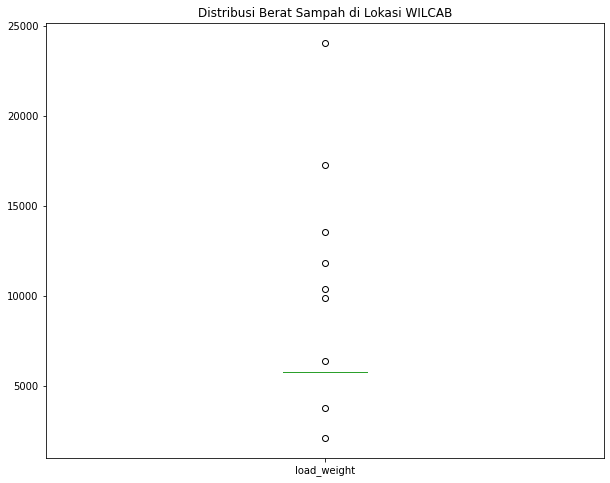

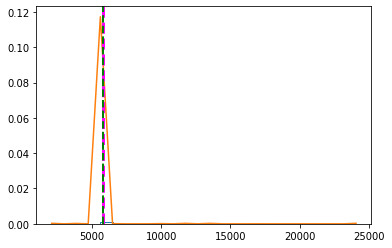

In [13]:
#VISUALISASI DATA ASLI BERAT SAMPAH LOKASI WILCAB

# Visualization of Box Plot of Grade

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Plot a box-whisker chart
wilcab['load_weight'].plot(kind='box', title='Distribusi Berat Sampah di Lokasi WILCAB', figsize=(10,8))
plt.show()

# Visualization of Distribution
Distribusi = wilcab['load_weight']
density = stats.gaussian_kde(Distribusi)
n, x, _ = plt.hist(Distribusi, histtype='step', bins=25, density = True)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(Distribusi.mean(), color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(Distribusi.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

load_weight skewness: 28.681860027738576
load_weight kurtosis: 968.8811963245824


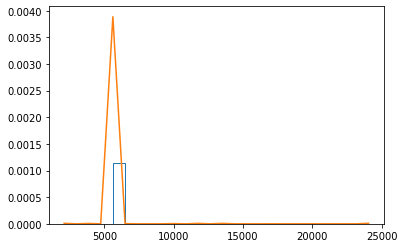

In [14]:
# Dapatkan Nilai Skewness dan Kurtosis

%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

kemiringan = ['load_weight']
for col in kemiringan:
    print(wilcab[col].name + ' skewness: ' + str(wilcab[col].skew()))
    print(wilcab[col].name + ' kurtosis: ' + str(wilcab[col].kurt()))
    n, x, _ = plt.hist(wilcab[col], histtype='step', bins=25, density = True)
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')

Boxplot : Sebuah kotak persegi panjang yang menunjukkan letak data antara persentil ke-25 dan ke-75 (kuartil pertama dan ketiga). Garis dalam kotak yang menunjukkan lokasi median (persentil ke-50 atau kuartil kedua). Dalam hal ini, dapat melihat bahwa **rentang interkuartil adalah antara 5800 dan 5800, dengan median sama seperti kuartil adalah 5800, lebih dekat ke bagian rata-rata adalah 5817, sehingga membentuk kontak persegi sama sisi namun terdapat beberapa titik data di luar sdari persegi boxplot.** Berdasarkan visualisasi bentuk boxplot lokasi WILCAB, **bahwa terdapat beberapa nilai data berada di luar kategorikan himpunan atau data outlier**.

----
Visualisasi Distribusi : Kali ini, distribusinya simetris, membentuk kurva "berbentuk lonceng". <span style="color:magenta">***mean***</span>, <span style="color:green">***median***</span>, **dan mode berada di lokasi yang berdekatan tetapi tidak menyebar secara merata di kedua sisi dari puncak pusat.** Berdasarkan visualisasi distribusi lokasi akhir pembuangan sampah di WILCAB, bahwa data bisa di kategorikan tidak berdistribusi normal.

---
Ukuran Kemiringan dan Kurtosis : Cara lain pendeteksian distribusi bisa dengan mengukur *kecondongan* (ke arah mana data dimiringkan dan sejauh mana) dan kurtosis (seberapa "puncak" data) untuk mendapatkan gambaran tentang bentuk distribusi data. **Nilai skewness adalah 29**. Berdasarkan nilai  koefisien kemiringan nya bernilai 29 yang tidak berada di antara rasio skewness -2 sampai 2, maka bentuk distribusinya tidak simetrik atau tidak berdistribusi normal.

Setelah dilakukan pengecekan distribusi normal dengan 3 cara pembuktian, yang membuktikan bahwa sekumpulan data berat dilokasi WILCAB tidak berdistribusi normal. Selanjutnya akan dilakukan pengecekan data outlier site WILCAB :

Pendeteksian Nilai Outlier

Metode untuk mengecek nilai oulier bisa mengunakan Tukey dengan ringkasan 5 angka untuk mendeteksi outlier. Intinya adalah bahwa data yang menyimpang dari median di atas ambang batas tertentu akan ditandai sebagai outlier. Rumus untuk deteksi outlier Tukey

${q_{3}+1.5*IQR}$

${q_{1}-1.5*IQR}$

In [35]:
Q1 = wilcab['load_weight'].quantile(0.25)
Q3 = wilcab['load_weight'].quantile(0.75)
IQR = Q3-Q1

setelah diperoleh nilai IQR dilakukan pembersihan data outlier dengan menggunakan niai quartile, untuk menghilangkan data oulier akan digunakan metode Z Score sebagai penganti aturan Tukey.

In [36]:
# Pembersihan data Outlier
wilcab2 = wilcab[~(((wilcab['load_weight'] < (Q1-1.5*IQR)) | (wilcab['load_weight'] > (Q3+1.5*IQR))))]
wilcab2 

,load_type,load_time,load_weight,dropoff_site
91403,SWEEPING,2008-11-21 10:00:00 UTC,5800.0,WILCAB
91404,SWEEPING,2005-08-22 12:15:00 UTC,5800.0,WILCAB
91405,SWEEPING,2008-10-01 12:04:00 UTC,5800.0,WILCAB
91406,SWEEPING,2006-12-11 09:55:00 UTC,5800.0,WILCAB
91407,SWEEPING,2005-08-23 03:00:00 UTC,5800.0,WILCAB
...,...,...,...,...
94152,SWEEPING,2008-06-03 10:00:00 UTC,5800.0,WILCAB
94153,SWEEPING,2009-11-19 09:00:00 UTC,5800.0,WILCAB
94154,SWEEPING,2006-05-22 12:00:00 UTC,5800.0,WILCAB
94155,SWEEPING,2006-05-18 12:30:00 UTC,5800.0,WILCAB


Berdasarkan Z-Score dengan drop data baik lower value maupun upper value nya sudah tidak ada nilai kosang, **dapat terlihat bahwa data ini tidak memiliki outlier lagi**.

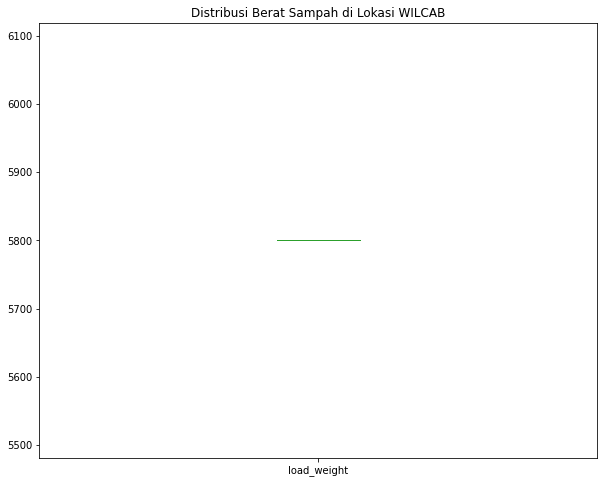

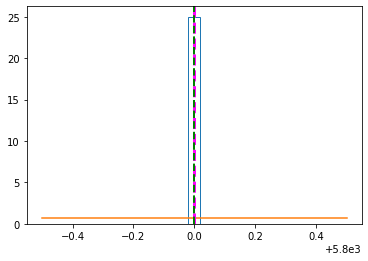

In [39]:
#VISUALISASI DATA ASLI BERAT SAMPAH LOKASI WILCAB TANPA OUTLIER

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Plot a box-whisker chart
wilcab2['load_weight'].plot(kind='box', title='Distribusi Berat Sampah di Lokasi WILCAB', figsize=(10,8))
plt.show()

# Visualization of Distribution
Distribusi2 = wilcab2['load_weight']
density = stats.gaussian_kde(Distribusi2)
n, x, _ = plt.hist(Distribusi2, histtype='step', bins=25, density = True)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(Distribusi2.mean(), color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(Distribusi2.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

load_weight skewness: 0
load_weight kurtosis: 0


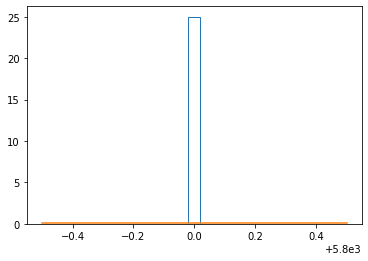

In [40]:
# Dapatkan Nilai Skewness dan Kurtosis

%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

kemiringan = ['load_weight']
for col in kemiringan:
    print(wilcab2[col].name + ' skewness: ' + str(wilcab2[col].skew()))
    print(wilcab2[col].name + ' kurtosis: ' + str(wilcab2[col].kurt()))
    n, x, _ = plt.hist(wilcab2[col], histtype='step', bins=25, density = True)
    plt.plot(x, density(x)*10)
    plt.show()
    print('\n')

Boxplot : Sebuah kotak persegi panjang yang menunjukkan letak data antara persentil ke-25 dan ke-75 (kuartil pertama dan ketiga). Garis dalam kotak yang menunjukkan lokasi median (persentil ke-50 atau kuartil kedua). Dalam hal ini, dapat melihat bahwa **rentang interkuartil adalah antara 5800 dan 5800, dengan median sama seperti kuartil adalah 5800, lebih dekat ke bagian rata-rata adalah 5817, Sehingga membentuk kontak yang presisis sama atau persegi sama sisi**. Berdasarkan visualisasi bentuk boxplot lokasi WILCAB, **bahwa data bisa di kategorikan berdistribusi Normal karena tidak ada data yang menyeber diluar persegi boxplot**.

----
Visualisasi Distribusi : Kali ini, distribusinya simetris, membentuk kurva "berbentuk lonceng". <span style="color:magenta">***mean***</span>, <span style="color:green">***median***</span>, **dan mode adalah di lokasi yang sama, dan data menyebar secara merata di kedua sisi dari puncak pusat.** Berdasarkan visualisasi distribusi lokasi akhir pembuangan sampah di WILCAB, **bahwa data bisa di kategorikan berdistribusi normal (atau terkadang distribusi *Gaussian*)**.

---
Ukuran Kemiringan dan Kurtosis : Cara lain pendeteksian distribusi bisa dengan mengukur *kecondongan* (ke arah mana data dimiringkan dan sejauh mana) dan kurtosis (seberapa "puncak" data) untuk mendapatkan gambaran tentang bentuk distribusi data. **Nilai skewness dan kurtosis adalah 0**. Berdasarkan nilai  koefisien kemiringan nya bernilai nol yang berarti ada di antara rasio skewness -2 sampai 2,**maka bentuk distribusinya simetrik atau berdistribusi normal**.


In [41]:
print('---Dropoff_site/Tempat Pembuangan Sampah di WILCAB dengan data outlier---')
print ('Mode: ' + str(wilcab['load_weight'].mode()[0]))
print ('Median: ' + str(wilcab['load_weight'].median()))
print ('Mean: ' + str(wilcab['load_weight'].mean()))
print ('S.dev: ' + str(wilcab['load_weight'].std()))
print(   )
print('---Dropoff_site/Tempat Pembuangan Sampah di WILCAB yang sudah tidak ada data outlier---')
print ('Mode: ' + str(wilcab2['load_weight'].mode()[0]))
print ('Median: ' + str(wilcab2['load_weight'].median()))
print ('Mean: ' + str(wilcab2['load_weight'].mean()))
print ('S.dev: ' + str(wilcab2['load_weight'].std()))

---Dropoff_site/Tempat Pembuangan Sampah di WILCAB dengan data outlier---
Mode: 5800.0
Median: 5800.0
Mean: 5817.0660856935365
S.dev: 473.15907586011605

---Dropoff_site/Tempat Pembuangan Sampah di WILCAB yang sudah tidak ada data outlier---
Mode: 5800.0
Median: 5800.0
Mean: 5800.0
S.dev: 0.0


Jika iya, berapa persen jumlah outliernya? Berdasarkan metode pengecekan data yang menjauh dari rata-rata sampel mengunakan standar deviasi bahwa nilai outlier sebanyak 473 dari 2754 baris, bahwa terdapat outlier sekitar 2,1% dari data keseluruhan berat sampah pada lokasi/site WILCAB.

Bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum!? centar tendency sebelum dikeluarkan data outlier berat sampah di lokasi WILCAB memiliki rata-rata sebesar 5817, median sebesar 5800, modus sebesar 5800 dan standar deviasi sebesar 473. Sedangkan centar tendency setelah dikeluarkan data outlier berat sampah di lokasi WILCAB memiliki rata-rata, median dan modus yang sama yaitu 5800 menandakan bahwa data wilcab2 berada dalam satu himpunan variabel yang sama, dengan standar deviasi bernilai nol atau tidak ada data yang menjauhi rata-rata sampel.

### 6

**Nomor 6**: Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier).

**Range**, cara sederhana untuk mengukur varians dalam kumpulan data adalah dengan mengidentifikasi perbedaan antara nilai terendah dan tertinggi. Ini disebut rentang, dan dihitung dengan mengurangkan nilai minimum dari nilai maksimum.

In [42]:
import pandas as pd

Range = ['load_weight']
for col in Range:
    print(wilcab2[col].name + ' range: ' + str(wilcab2[col].max() - wilcab2[col].min()))

load_weight range: 0.0


**Varians**, cara menunjukkan seberapa jauh data-data yang di miliki tersebar dari nilai rata-ratanya. Sedangkan, **standar deviasi** cara untuk mengetahui berapa banyak nilai atau jumlah data yang berbeda dari rata-rata.


In [43]:
# Get the Variance
print(f'Nilai variance :', wilcab2['load_weight'].var())

Nilai variance : 0.0


In [44]:
# Get the Standard Deviation
print(f'Nilai standard deviation :', wilcab2['load_weight'].std())

Nilai standard deviation : 0.0


Nilai simpangan baku pada kumpulan data bisa bernilai nol atau lebih kecil dari nol. Jika nilainya nol menandakan tidak terlalu jauh dari mean maupun median, maka seluruh nilai yang terdapat dalam himpunan itu sama.

Informasi ukuran penyebaran (Range, Varians dan Standar Deviasi) tempat pembuangan berat sampah di lokasi WILCAB, untuk evaluasi bagi pemerintah kota Austin :

1. Nilai range, varians dan standar deviasi tempat pembuangan berat sampah pada lokasi WILCAB bernilai nol menujukkan bahwa sekumpulan data tersebut sebagian ada yang bernilai identik namun sebagian juga tidak identik. Menandakan bahwa lokasi akhir pembuangan sampah di WILCAB berada dalam himpunan atau kumpulan dalam variabel. **Hal ini bisa menjadi evaluasi bagi pemerintah kota Austin untuk selalu menampung berat sampah sebesar 5800 dan tidak menampung berat sampah melebih dari nilai yang seharusnya. Sehingga sistem pembuangan dan pengolahan sampah pada lokasi WILCAB bisa selalu berkerja konsisten dengan baik.**

### 7

**Nomor 7 :** Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

Rumus untuk mencari interval kepercayaan: x̅ ± Z,alpha/2 * σ/√(n). Menggunakan nilai mean, nilai standar deviasi, level kepercayan 95% dan n data.

In [31]:
#confidence interval Keseluruhan data
from scipy import stats
import numpy as np
mean, sigma = np.mean(data), np.std(data)

conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(data)))

In [39]:
print(conf_int)

(array([7065.68698456]), array([7111.61625544]))


In [ ]:
mean, sigma = np.mean(mrf), np.std(mrf)
conf_int_mrf = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(mrf)))

In [41]:
print(conf_int_mrf)

(array([5281.08397793]), array([5329.19969292]))


In [ ]:
mean, sigma = np.mean(elmont), np.std(elmont)
conf_int_elmont = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(elmont)))

In [43]:
print(conf_int_elmont)

(array([5793.62200095]), array([5871.38073503]))


In [ ]:
mean, sigma = np.mean(kramer), np.std(kramer)
conf_int_kramer = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(kramer)))

In [45]:
print(conf_int_kramer)

(array([5762.77578469]), array([5948.4900381]))


In [ ]:
mean, sigma = np.mean(wilcab), np.std(wilcab)
conf_int_wilcab = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(wilcab)))

In [49]:
print(conf_int_wilcab)

(array([ 5.79939780e+03, -3.73478945e-02]), array([5.83473437e+03, 3.73478945e-02]))


In [ ]:
mean, sigma = np.mean(zilker), np.std(zilker)
conf_int_zilker = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(zilker)))

In [51]:
print(conf_int_zilker)

(array([8978.66671434]), array([9653.58328566]))


In [ ]:
mean, sigma = np.mean(clarkson), np.std(clarkson)
conf_int_clarkson = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(clarkson)))

In [53]:
print(conf_int_clarkson)

(array([5768.15202576]), array([5898.37647165]))


In [ ]:
mean, sigma = np.mean(park_bend), np.std(park_bend)
conf_int_park_bend = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(park_bend)))

In [55]:
print(conf_int_park_bend)

(array([7097.85578804]), array([7850.6795655]))


In [ ]:
mean, sigma = np.mean(tds_mrf), np.std(tds_mrf)
conf_int_tds_mrf = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(tds_mrf)))

In [57]:
print(conf_int_tds_mrf)

(array([10079.58669495]), array([10153.79217508]))


Confidence Interval merupakan parameter yang digunakan untuk menentukan keakuratan Mean suatu sampel. Istilah statistik yang menggambarkan tingkat kepercayaan terhadap hasil kalkulasi. Keakuratan covidence level atau persentase keyakinan yang digunakan 95%, interval artinya jika saya mengambil 100 samples maka kemungkinan 95 sample saya akan mencakup nilai Population Mean sesungguhnya.

---
Nilai Confidence Interval untuk keseluruhan berat sampah di semua lokasi antara 7066 sampai 7112, berat sampah di lokasi MRF antara 5281 sampai 5329, berat sampah di lokasi ELMONT antara 5794 sampai 5871, berat sampah di lokasi KRAMER antara 5763 sampai 5948, berat sampah di lokasi ZILKER antara 8979 sampai 9653, berat sampah di lokasi CLARKSON antara 5768 sampai 5898, berat sampah di lokasi PARK BEND antara 7097 sampai 7851 dan berat sampah di lokasi TDS_MRF antara 10079 sampai 10153.

---
Informasi Confidence Interval tempat pembuangan sampah, untuk evaluasi bagi pemerintah kota Austin :

1. Tingkat kepercayaan keakuratan semua lokasi tempat pembuangan berat sampah berada di kisaran nilai 7066 sampai 7112. **Hal ini bisa menjadi evaluasi bagi pemerintah kota Austin jika ingin membuat lokasi penampungan berat sampah baru/site baru, lokasi baru yang direncanakan bisa menerima tampungan berat sampah di antara 7066 sampai 7112.**

2. Tingkat kepercayaan keakuratan tempat pembuangan berat sampah lokasi TDS_MRF berada di kisaran nilai 10079 sampai 10153. **Hal ini bisa menjadi evaluasi bagi pemerintah kota Austin, bawha lokasi TDS_MRF selalu menerima tampungan berat sampah lebih banyak dibandingkan lokasi lainya yaitu antara 10079 sampai 10153, maka pemerintah harus lebih banyak mengerahkan perkerja dan mesin pengolahan sampah di lokasi TDS_MRF. Sehingga sistem pembuangan dan pengelolaan sampah di lokasi TDS_MRF selalu optimal dan berjalan lancar.**

### 8

**Nomor 8** : Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima).

In [58]:
data.head()

,load_type,load_time,load_weight,dropoff_site
0,RECYCLING - SINGLE STREAM,2009-08-07 11:51:00 UTC,4400.0,MRF
1,RECYCLING - PAPER,2008-04-11 12:31:00 UTC,1920.0,MRF
2,RECYCLING - SINGLE STREAM,2009-01-16 12:58:00 UTC,4140.0,MRF
3,RECYCLING - SINGLE STREAM,2009-07-10 11:21:00 UTC,4020.0,MRF
4,RECYCLING - COMINGLE,2006-02-03 12:36:00 UTC,1700.0,MRF


**A. Independent sample t-test** merupakan uji yang digunakan untuk mengetahui adakah perbedaan mean antara dua kelompok bebas atau dua kelompok yang tidak berpasangan dengan maksud bahwa kedua kelompok data berasal subjek yang berbeda. Maka saya akan menguji perbedaan rata-rata berat sampah yang berada di lokasi Park Bend dan Tds-Mrf.

In [59]:
#Melihat rata-rata 
Berat_sampah_di_parkbend = data[data.dropoff_site == 'PARK BEND'].groupby('load_time').sum()['load_weight'] 
Berat_sampah_di_tdsmrf = data[data.dropoff_site == 'TDS - MRF'].groupby('load_time').sum()['load_weight']

print("Rata-rata Berat Sampah di Lokasi PARK BEND : ",Berat_sampah_di_parkbend.mean())
print("Rata-rata Berat Sampah di Lokasi TDS - MRF : ",Berat_sampah_di_tdsmrf.mean())

Rata-rata Berat Sampah di Lokasi PARK BEND :  7830.185185185185
Rata-rata Berat Sampah di Lokasi TDS - MRF :  11317.86565773674


Rata-rata Berat Sampah di Lokasi PARK BEND bernilai 7830 dan Rata-rata Berat Sampah di Lokasi TDS - MRF bernilai 11318, apakah terdapat perbedaan berat sampah di antara dua lokasi tersebut.

Hipotesis

**H0: μ_PARK BEND(7830) = μ_TDS-MRF(11318)** (Perbedaan rata-rata berat sampah yang di lokasi park bend sama dengan lokasi tds-mrf)

**H1: μ_PARK BEND(7830) != μ_TDS-MRF(11318)** (Perbedaan rata-rata berat sampah yang di lokasi park bend tidak sama dengan lokasi tds-mrf)

In [60]:
#Kalau independent pakai stats.ttest_ind
t_stat, p_val = stats.ttest_ind(Berat_sampah_di_parkbend,Berat_sampah_di_tdsmrf)
print('P-value:',p_val) 
print('t-statistics:',t_stat)

P-value: 6.667670582888495e-23
t-statistics: -9.857740603999408


Nilai p-value adalah 0.00000 < (lebih kecil) dari taraf signifikansi adalah 0.05,  maka menolak hipotesis H0. Sehingga Hipotesis H1 di terima, perbedaan rata-rata berat sampah yang di lokasi park bend tidak sama dengan lokasi tds-mrf.

**B. Anova** merupakan analisis yang menguji perbedaan rerata antar grup. Grup disini bisa berarti kelompok atau jenis perlakuan. Maka saya aka menguji perbedaan rata-rata berat sampah yang ada di lokasi elmont, lokasi kramer dan lokasi clarkson. 

In [61]:
#Melihat rata-rata 
Berat_sampah_di_elmont = data[data.dropoff_site == 'ELMONT'].groupby('load_time').sum()['load_weight'] 
Berat_sampah_di_kramer = data[data.dropoff_site == 'KRAMER'].groupby('load_time').sum()['load_weight']
Berat_sampah_di_clarkson = data[data.dropoff_site == 'CLARKSON'].groupby('load_time').sum()['load_weight']

print("Rata-rata Berat Sampah di Lokasi ELMONT : ",Berat_sampah_di_elmont.mean())
print("Rata-rata Berat Sampah di Lokasi KRAMER : ",Berat_sampah_di_kramer.mean())
print("Rata-rata Berat Sampah di Lokasi CLARKSON : ",Berat_sampah_di_clarkson.mean())

Rata-rata Berat Sampah di Lokasi ELMONT :  6099.511444921316
Rata-rata Berat Sampah di Lokasi KRAMER :  6209.3288590604025
Rata-rata Berat Sampah di Lokasi CLARKSON :  6102.005420054201


Rata-rata Berat Sampah di Lokasi ELMONT bernilai 6099, Rata-rata Berat Sampah di Lokasi KRAMER bernilai 6209 dan Rata-rata Berat Sampah di Lokasi CLARKSON bernilai 6102, apakah terdapat perbedaan berat sampah di antara tiga lokasi tersebut.

Hipotesis

**H0: μ_PARK ELMONT(6099) = μ_PARK KRAMER(6209) = μ_CLARKSON(6102)** (Perbedaan rata-rata berat sampah yang di 3 lokasi sama)

**H1: μ_PARK ELMONT(6099) != μ_PARK KRAMER(6209) != μ_CLARKSON(6102)** (Perbedaan rata-rata berat sampah yang di 3 lokasi tidak sama)

In [62]:
# Anova pakai uji F
f_stat,p_value = stats.f_oneway(Berat_sampah_di_elmont, Berat_sampah_di_kramer, Berat_sampah_di_clarkson)
print('P-value:',p_value)

P-value: 0.5525571324017636


Nilai p-value adalah 0.5525 > (lebih besar) dari taraf signifikansi adalah 0.05,  maka gagal menolak hipotesis H0. Sehingga Hipotesis H0 di terima, perbedaan rata-rata berat sampah yang di 3 lokasi sama.

### 9

**Nomor 9** : Tarik benang merah dan kesimpulan dari perhitungan dan analisa yang kamu telah lakukan di langkah-langkah sebelumnya. Ceritakan kesimpulanmu kepada pemerintah kota dan hindari bahasa teknis yang tidak dimengerti oleh orang yang bukan data scientist!


a. Melihat rentang waktu pengambilan data ?

Jawab : Rentang waktu pengambilan data sistem pembuangan dan pengelolaan sampah di kota austin dilakukan dari tanggal 2000-01-26 12:39:00 UTC sampai tanggal 2021-07-11 07:07:05 UTC. Berdasarkan rentang waktu tersebut, bahwa pemerintah kota austin sudah selalu konsisten melakukan pengloahan sampah setiap harinya, diharapkan untuk tetap mempertahankan kekonsistenanya dalam mengelolah sampah harian.

----

b. Ada apa saja tipe load sampah di kota Austin berdasarkan data ?

Jawab : Tipe pembuangan sampah dari semua material sisa yang berbentuk padatan dan sudah dibuang oleh manusia berdasarkan data pada lokasi kota austin antara lain berjenis tipe RECYCLING - PLASTIC BAGS dengan jumah berat sampah sebesar 680,  CONTAMINATED RECYCLING dengan jumlah berat sampah sebesar 6980, YARD TRIMMING - X-MAS TREES dengan jumlah berat sampah sebesar 7500, DEAD ANIMAL dengan jumlah berat sampah sebesar 9700, MULCH dengan jumlah berat sampah sebesar 18740,  LITTER dengan jumlah berat sampah sebesar 28400, MIXED LITTER dengan jumlah berat sampah sebesar 54420, ORGANICS dengan jumlah berat sampah sebesar 82820, BULK dengan jumlah berat sampah sebesar 236660, RECYCLED METAL dengan jumlah berat sampah sebesar 370190, TIRES dengan jumlah berat sampah sebesar 3002758, BRUSH dengan jumlah berat sampah sebesar 3275810, YARD TRIMMING dengan jumlah berat sampah sebesar 8560222, GARBAGE COLLECTIONS dengan jumlah berat sampah sebesar 14257020, SWEEPING dengan jumlah berat sampah sebesar 29624017, RECYCLING - COMINGLE dengan jumlah berat sampah sebesar 101101409, RECYCLING - PAPER dengan jumlah berat sampah sebesar 141128780 dan RECYCLING - SINGLE STREAM dengan jumlah berat sampah sebesar 761531637. Atau terdapat 18 jenis/tipe sampah yang dibuang lokasi kota Austin. Berdasarkan informasi ini, bahwa di kota austin terdapat banyak jenis tipe sampah dengan jumlah keseluruhan yang terbuang berbeda-beda, bisa menjadi evaluasi bagian UKM kota austin bisa mendaur ulang jenis sampah yang jumlahnya besar untuk dijadikan barang yang bisa di pakai lagi. Misalnya sampah RECYLING-PAPER tergolong jenis sampah yang jumlahnya besar, pemerintah bisa mendaur ulang kertasnya menjadi kerajinan yang berguna sehingga mengurangi jumlah berat sampah tersebut melalui tenaga kerja UKM.

----

c. Mengetahui tempat pembuangan sampah ada dimana saja ?

Jawab : Tempat pembuangan sampah atau tempat akhir dari pemprosesan sampah di kota austin terdapat 8 lokasi, antara lain MRF, ELMONT, KRAMER, WILCAB, ZILKER, CLARKSON, PARK BEND dan TDS - MRF. Atau terdapat 8 lokasi akhir dari pembuangan sampah di kota Austin.

----

d. Berapa site lokasi yang dibutuhkan untuk menampung berat sampah ?

Jawab : Hasil Tingkat kepercayaan keakuratan semua lokasi tempat pembuangan berat sampah berada di kisaran nilai 7066 sampai 7112. Hal ini bisa menjadi evaluasi bagi pemerintah kota Austin jika ingin membuat lokasi penampungan berat sampah baru/site baru, lokasi baru yang direncanakan bisa menerima tampungan berat sampah di antara 7066 sampai 7112 setiap harinya.

----

e. Apakah lokasi dropoff_site zilker dan park bend memilik kapasitas menampung sampah yang sama ?

jawab : Hasil uji independet t-test menunjukkan ada perbedaan rata-rata lokasi park bend dengan lokasi tds-mrf. Lokasi park bend dengan tds-mrf memiliki signifikan yang berbeda dalam menampung berat sampah. Kedua loksi tersebut memiliki ukuran populasi yang berbeda sehingga rata-rata sampel nya tidak sama, Karena memiliki perbedaan rata-rata dalam menampung berat sampah, pemerintah kota austin harus memberikan pelayanan yang berbeda di kedua tempat tersebut. Misalnya lokasi tds-mrf memiliki rata-rata yang jumlahnya lebih besar dibandingkan lokasi park bend, maka pemernitah harus lebih banyak memperhatikan sistem pengolakan lokasi tds-mrf agar terus berjalan dengan baik.

----

f. Apakah lokasi dropoff_site elmont, kramer dan clarkson memiliki kapasitas menampung sampah yang sama ?

Jawab : Hasil uji Anova menujukkan perbedaan rata-rata lokasi elmont, kramer dan clarkson dalam menampung berat sampah adalah sama. Tidak ada perbedaan yang signifikan antara Lokasi elmont, kramer dan clarkson dalam menampung berat sampah. Ketiga loksi tersebut memiliki ukuran populasi yang sama sehingga rata-rata sampel nya juga sama, Karena memiliki kesamaan rata-rata dalam menampung berat sampah, pemerintah kota austin tetap harus mempertahankan kekonsistenan sistem pengolahan dan penampungan sampah di ketiga loksi tersebut, agar terus berjalan dengan baik.

### Jawab pertanyaan berikut untuk mengasah pemahaman konsepmu!


Apa perbedaan statistik deskriptif dan inferensial?

1.   Apa perbedaan statistik deskriptif dan inferensial?

Jawab : Statistika deskripsi merupakan metode statistika yang berkaitan dengan cara **pengumpulan, pengolahan sampai penyajian data **untuk memberi suatu informasi, Sedangkan Statistika inferensial merupakan metode statistika yang berkaitan dengan cara **menganalisis, menginterpretasikan sampai penarikan kesimpulan** dari hasil analisa.

2.   Metrik pada central tendency apa yang tepat digunakan untuk menyimpulkan data yang terdistribusi normal dan tidak? Apakah sama atau berbeda?

Jawab : Central tendency yang digunakan untuk mendeskripsikan distribusi normal adalah mean, median dan modus.  **Jika mean, modus dan median memiiki nilai sama, bisa dikatakan bahwa data tersebut distribusi normal**. Pada site WILCAB yang saya analisis memiliki mean, modus dan median yang hampir mirip sehingga di kategorikan berdistribusi normal.

3.   Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

Jawab : **Pendeteksian data outlier metode IQR, berdasarkan proses tersebut site yang saya pilih yaitu WILCAB terdapat data yang oulier. Sehingga di lakukan pembersihan lower value dan upper value menggunakan metode Tukey's atau Z-score**. Atau cara lain bisa dengan drop nilai outliernya, jika terdapat data outlier bisa dilakukan drop index outlier pada variabel yang ada outliernya.
4.   Apa konsep dibalik central tendency sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?

Jawab : **Centarl tendency yang digunakan untuk pencarian nilai confidence interval adalah mean dan standar deviasi.** Mean sebagai pengukuran pada sejumah sampel atau menghitung nilai rata-rata pengukuran, untuk memperkirakan nilai aktual untuk pengukuran tersebut. Standar deviasi sebagai indentifikasi jarak antar masing-masing nilai di dalam populasi data dan sebagai indentfikasi nilai outlier dalam sampel, yang mempengaruhi tingkat interval keyakinan dalam mewakili populasi tersebut. 

5.   Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

Jawab : Saya menggunakan Independent sample t-test, karena rata-rata berat sampah di lokasi park bend dengan lokasi tds-mrf berada antara dua kelompok bebas atau **dua kelompok yang sama dengan maksud bahwa kedua kelompok data berasal subjek yang berbeda**. Saya juga menggunakan metode anova, karena rata-rata berat sampah di lokasi elmont, kramer dan clarkson **berada dalam kelompok yang sama tetapi memiliki beberapa subjek yang berbeda lebih dari 2 atau n subjek.**